# Simulations for determining best values of $\lambda$

In [1]:
# TEST

import numpy
import os

import helpers
import matplotlib

import astropy
from astropy.io import fits

from scipy import signal

cmap = 'turbo'
matplotlib.rcParams['figure.figsize'] = [10, 5]

## Determine number of sample points. Use exponential curve instead of linear to allow for better coverage for lower values of lambda

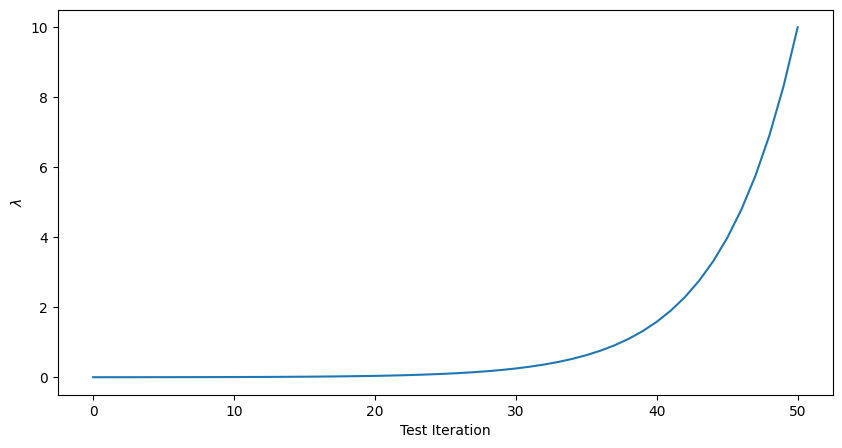

In [2]:
num_samples = 50
lambda_low = 0.001
lambda_high = 10

step = 1 / float(num_samples)

x_vals = numpy.arange(0, 1 + step, step)

lambdas = [0] * len(x_vals)
for i, v in enumerate(x_vals):
    lambdas[i] = helpers.exp_growth(v, lambda_low, lambda_high, steepness = 1)
    
helpers.plot1D(range(0, len(lambdas)), lambdas, "Test Iteration", "$\lambda$")

## Test case 1: SGR A* from Meerkat Survey with 249600 visibilities

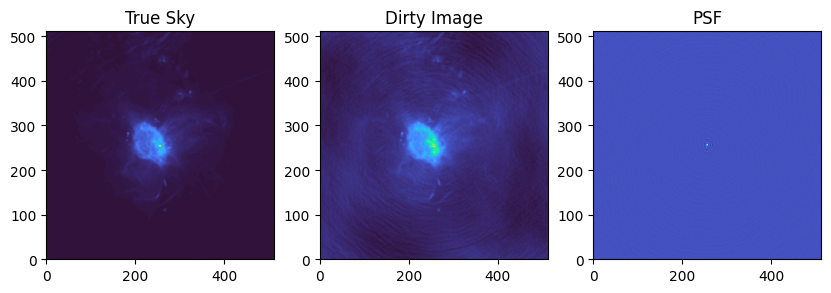

In [3]:
gt = helpers.readFits("lambda_tests/SGRA_full_gt.fits")
dirty = helpers.readFits("lambda_tests/SGRA_full_dirty.fits")
psf = helpers.readFits("lambda_tests/SGRA_full_psf.fits")

helpers.plotGDP(gt, dirty, psf, cmap)

path = "results/lambda_results/SGRA_full/"

Best Lambda according to SNR: 0.04786300923226383


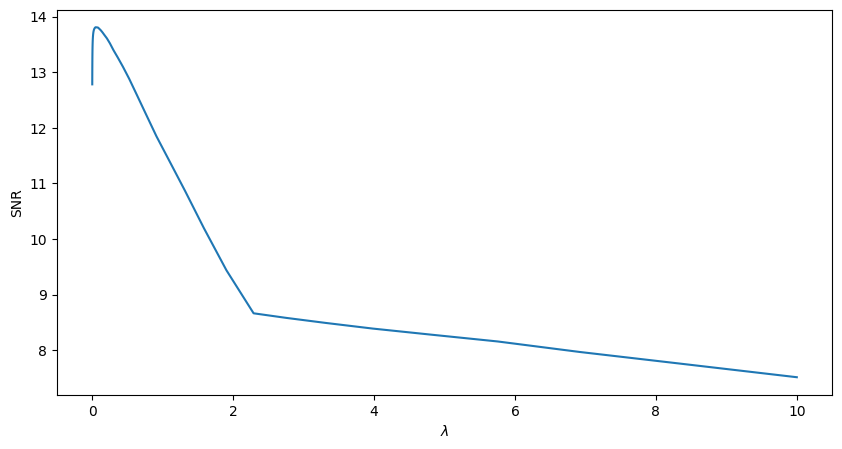

Best Lambda according to SSIM: 0.022908676527677734


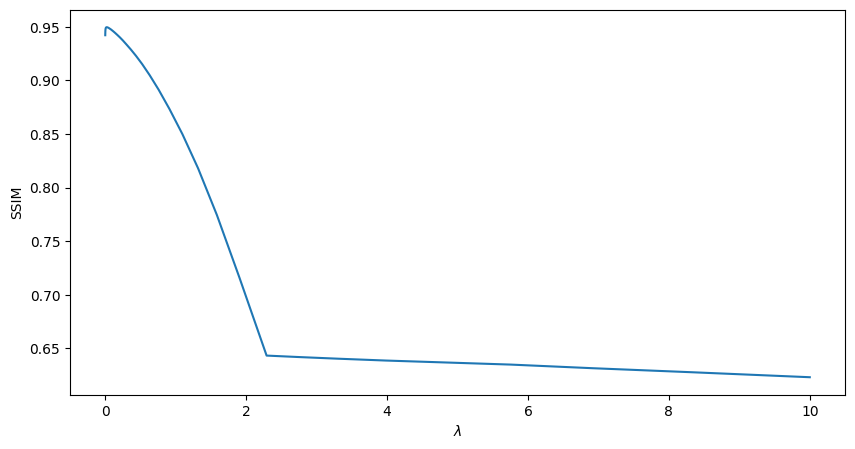

In [4]:
snrs = helpers.read_csv(path + "snr.dat")
snrs = [float(x) for x in snrs]
max_snr_idx = numpy.argmax(snrs)
print("Best Lambda according to SNR: " + str(lambdas[max_snr_idx]))
helpers.plot1D(lambdas, snrs, "$\lambda$", "SNR")

helpers.computeErrorForSavedResults(gt, lambdas, path, "ssim.dat", helpers.compute_ssim)

ssims = helpers.read_csv(path + "ssim.dat")
ssims = [float(x) for x in ssims]
max_ssim_idx = numpy.argmax(ssims)
print("Best Lambda according to SSIM: " + str(lambdas[max_ssim_idx]))
helpers.plot1D(lambdas, ssims, "$\lambda$", "SSIM")

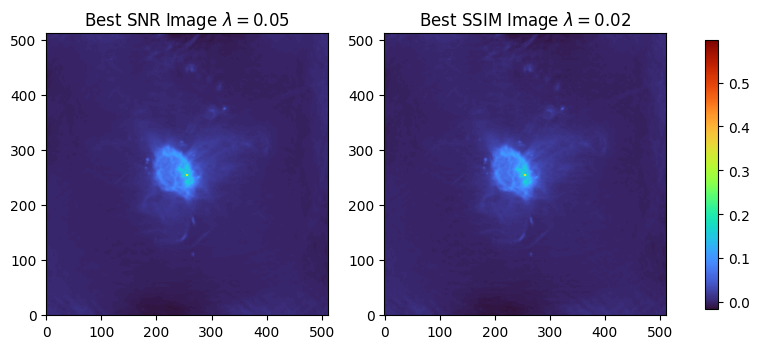

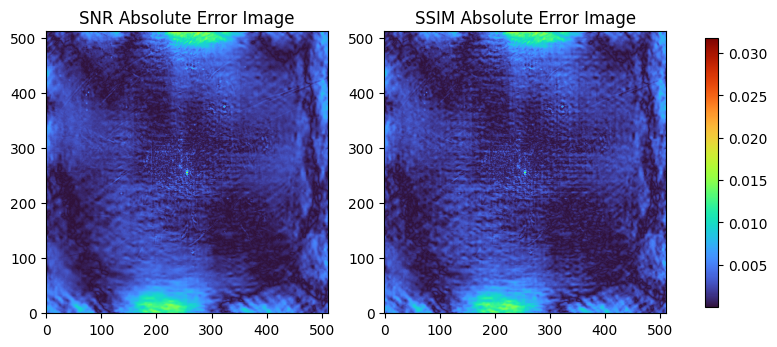

In [5]:
helpers.plotSNRvsSSIM(lambdas, path, max_snr_idx, max_ssim_idx, gt, cmap)

## Test case 2: SGR A* from Meerkat Survey with 249600 visibilities with noise

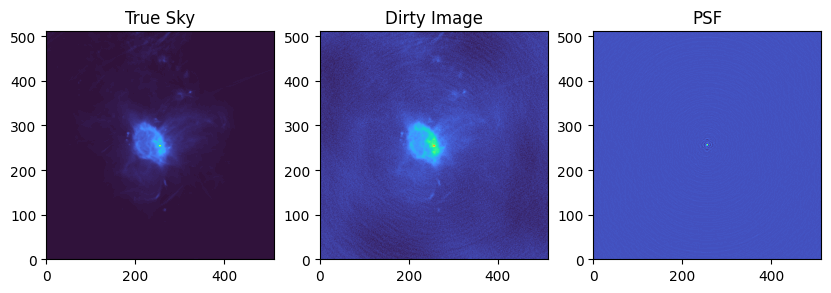

In [6]:
dirty = helpers.readFits("lambda_tests/SGRA_noisy_dirty.fits")

helpers.plotGDP(gt, dirty, psf, cmap)

path = "results/lambda_results/SGRA_noisy/"

Best Lambda according to SNR: 0.5248074602497729


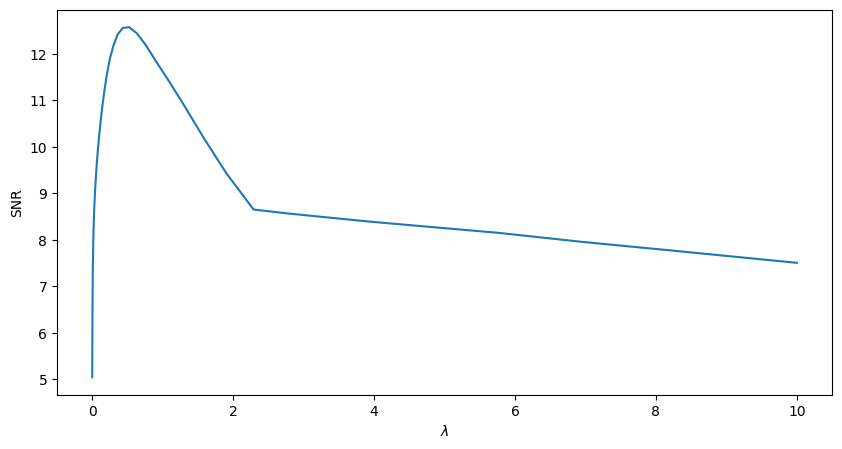

Best Lambda according to SSIM: 0.30199517204020165


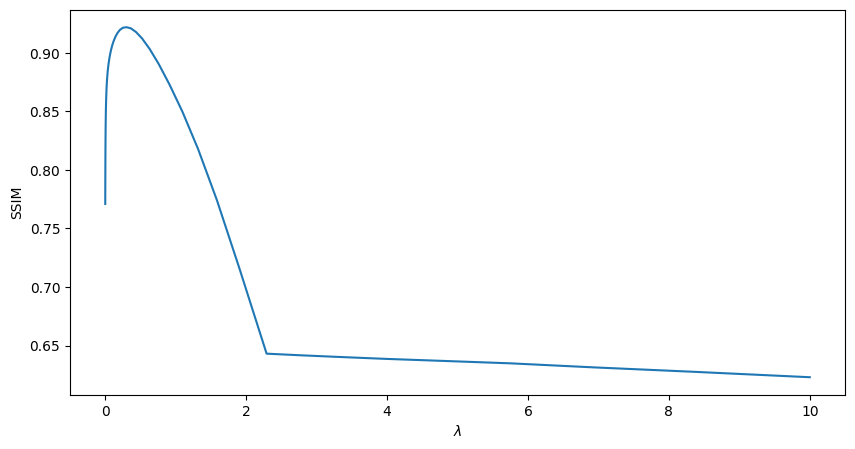

In [7]:
snrs = helpers.read_csv(path + "snr.dat")
snrs = [float(x) for x in snrs]
max_snr_idx = numpy.argmax(snrs)
print("Best Lambda according to SNR: " + str(lambdas[max_snr_idx]))
helpers.plot1D(lambdas, snrs, "$\lambda$", "SNR")

helpers.computeErrorForSavedResults(gt, lambdas, path, "ssim.dat", helpers.compute_ssim)

ssims = helpers.read_csv(path + "ssim.dat")
ssims = [float(x) for x in ssims]
max_ssim_idx = numpy.argmax(ssims)
print("Best Lambda according to SSIM: " + str(lambdas[max_ssim_idx]))
helpers.plot1D(lambdas, ssims, "$\lambda$", "SSIM")

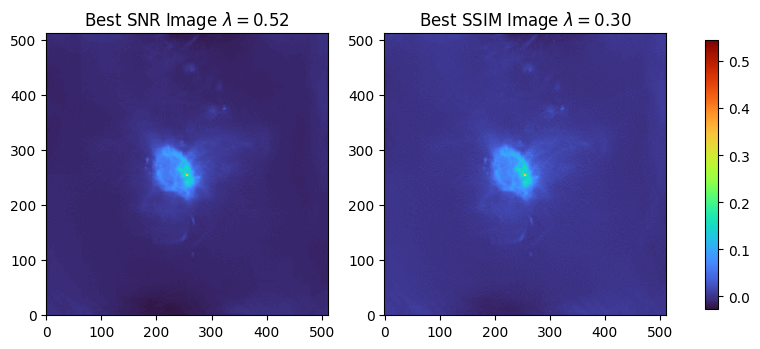

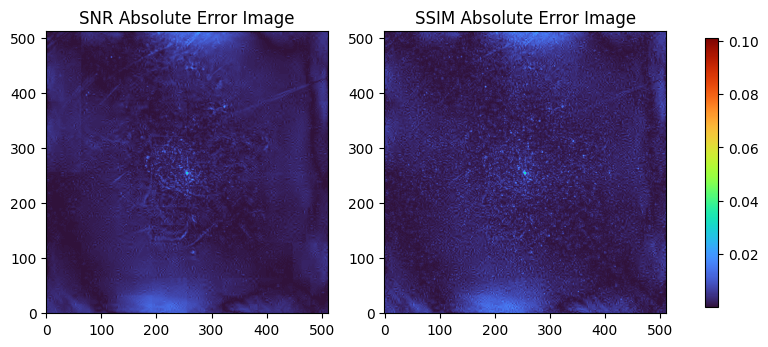

In [8]:
helpers.plotSNRvsSSIM(lambdas, path, max_snr_idx, max_ssim_idx, gt, cmap)

## Test case 3: SGR A* from Meerkat Survey with 62400 visibilities

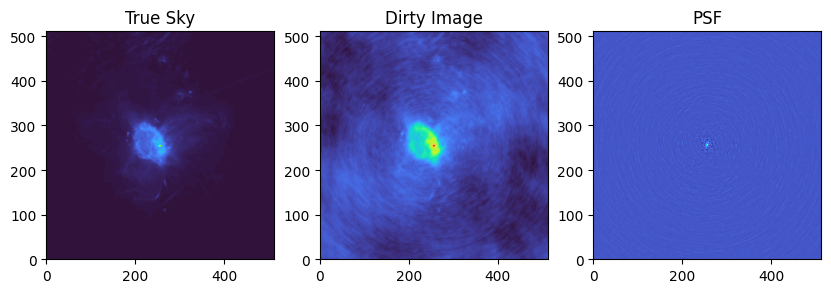

In [9]:
dirty = helpers.readFits("lambda_tests/SGRA_shortexp_dirty.fits")
psf = helpers.readFits("lambda_tests/SGRA_shortexp_psf.fits")

helpers.plotGDP(gt, dirty, psf, cmap)

path = "results/lambda_results/SGRA_shortexp/"

Best Lambda according to SNR: 10.0


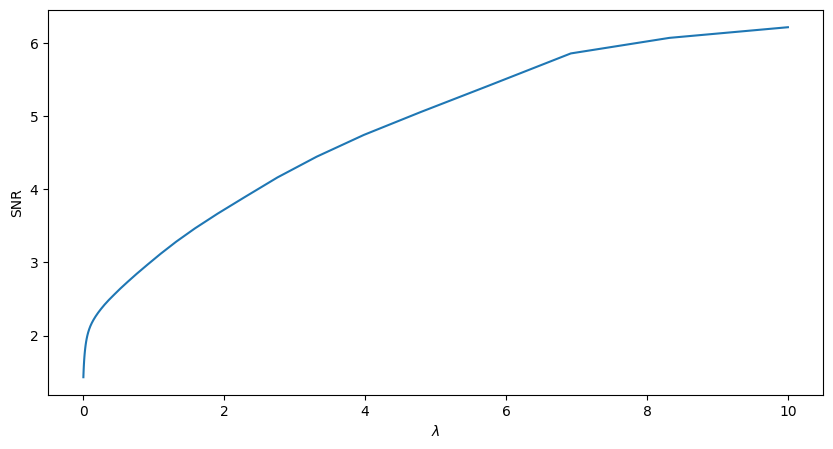

Best Lambda according to SSIM: 10.0


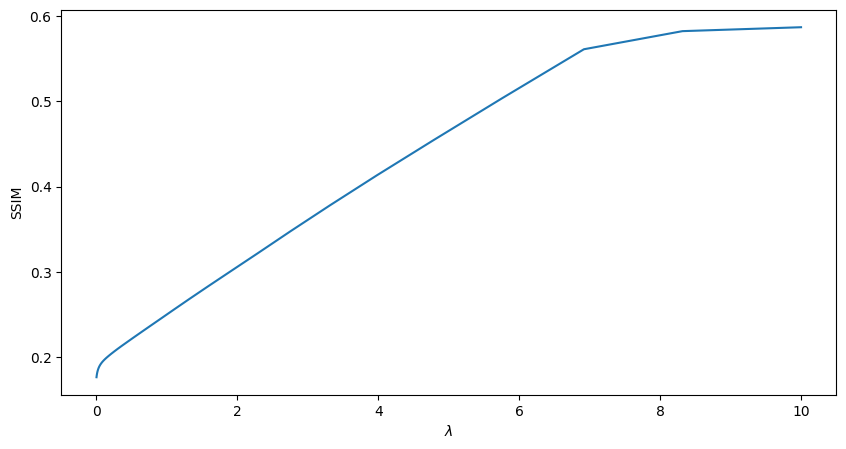

In [10]:
snrs = helpers.read_csv(path + "snr.dat")
snrs = [float(x) for x in snrs]
max_snr_idx = numpy.argmax(snrs)
print("Best Lambda according to SNR: " + str(lambdas[max_snr_idx]))
helpers.plot1D(lambdas, snrs, "$\lambda$", "SNR")

helpers.computeErrorForSavedResults(gt, lambdas, path, "ssim.dat", helpers.compute_ssim)

ssims = helpers.read_csv(path + "ssim.dat")
ssims = [float(x) for x in ssims]
max_ssim_idx = numpy.argmax(ssims)
print("Best Lambda according to SSIM: " + str(lambdas[max_ssim_idx]))
helpers.plot1D(lambdas, ssims, "$\lambda$", "SSIM")

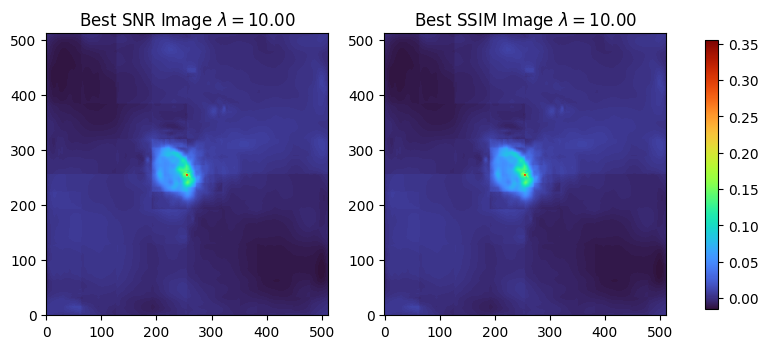

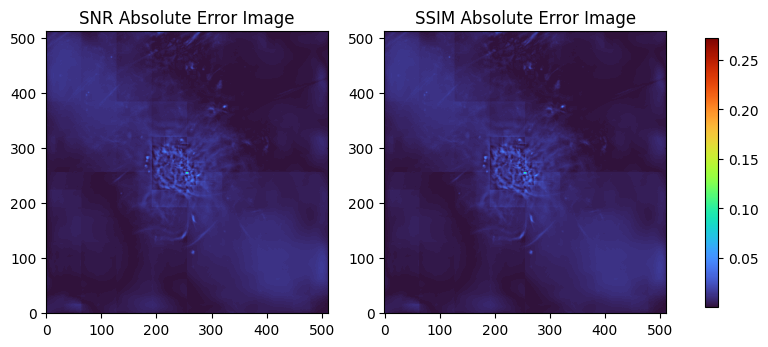

In [11]:
helpers.plotSNRvsSSIM(lambdas, path, max_snr_idx, max_ssim_idx, gt, cmap)

## Test case 4: SGR B2 from Meerkat Survey with 998400 visibilities

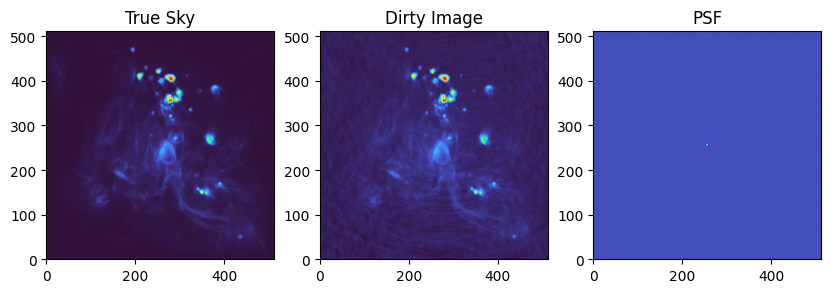

In [12]:
dirty = helpers.readFits("lambda_tests/SGRB_full_dirty.fits")
psf = helpers.readFits("lambda_tests/SGRB_full_psf.fits")
gt = helpers.readFits("lambda_tests/SGRB_full_gt.fits")

#dirty = signal.fftconvolve(gt, psf, mode='same')

helpers.plotGDP(gt, dirty, psf, cmap)

path = "results/lambda_results/SGRB_full/"

Best Lambda according to SNR: 0.1


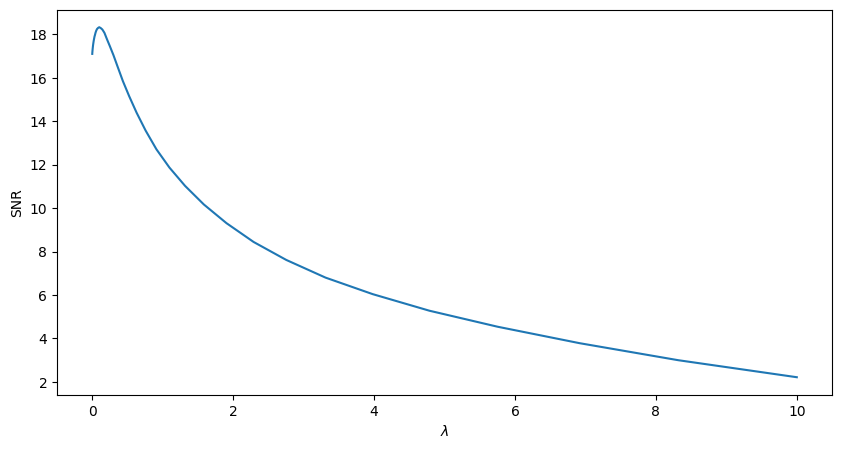

Best Lambda according to SSIM: 0.1


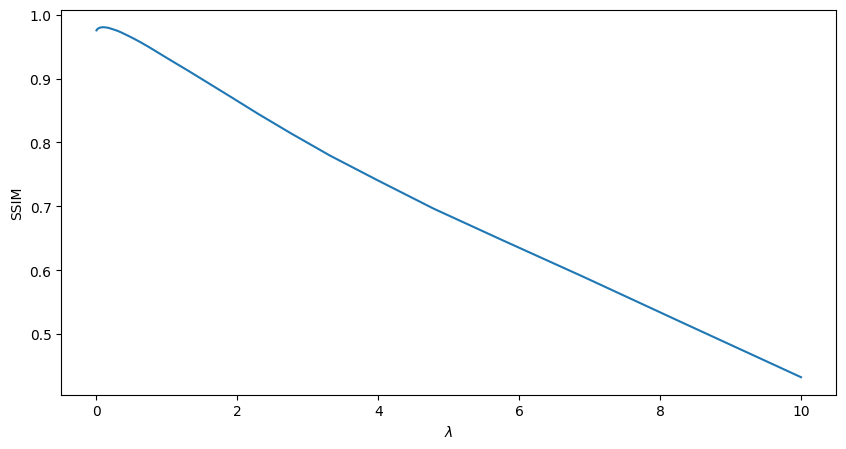

In [14]:
snrs = helpers.read_csv(path + "snr.dat")
snrs = [float(x) for x in snrs]
max_snr_idx = numpy.argmax(snrs)
print("Best Lambda according to SNR: " + str(lambdas[max_snr_idx]))
helpers.plot1D(lambdas, snrs, "$\lambda$", "SNR")

helpers.computeErrorForSavedResults(gt, lambdas, path, "ssim.dat", helpers.compute_ssim)

ssims = helpers.read_csv(path + "ssim.dat")
ssims = [float(x) for x in ssims]
max_ssim_idx = numpy.argmax(ssims)
print("Best Lambda according to SSIM: " + str(lambdas[max_ssim_idx]))
helpers.plot1D(lambdas, ssims, "$\lambda$", "SSIM")

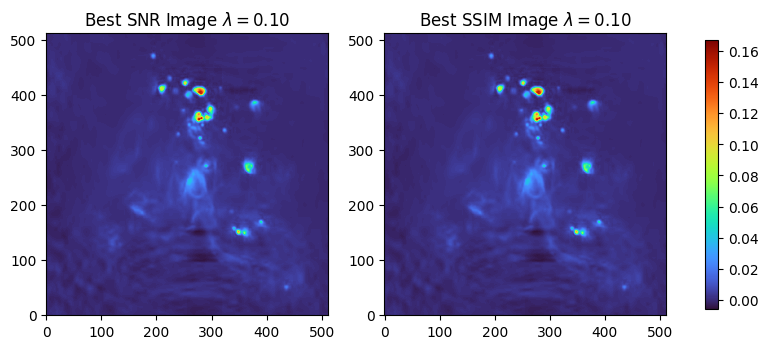

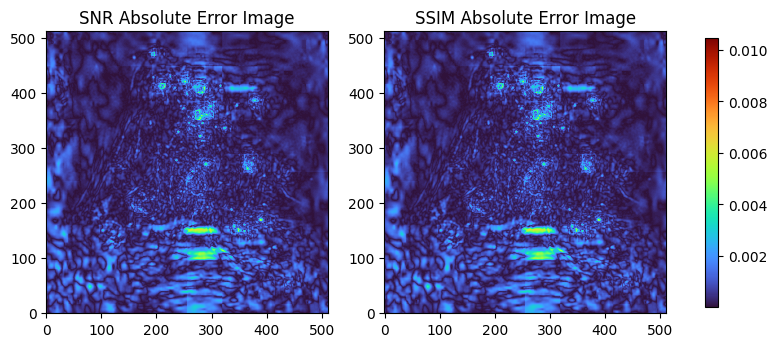

In [15]:
helpers.plotSNRvsSSIM(lambdas, path, max_snr_idx, max_ssim_idx, gt, cmap)

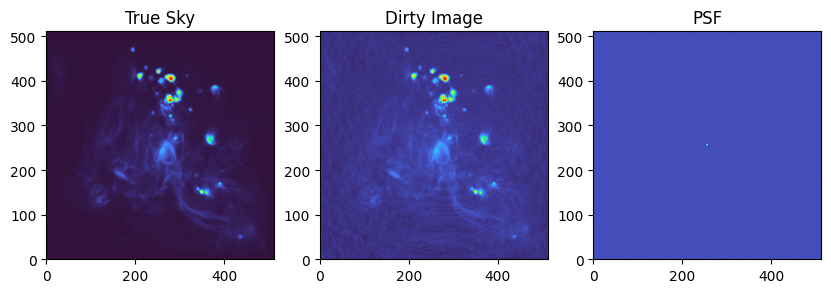

In [32]:
dirty = helpers.readFits("lambda_tests/SGRB_noisy_dirty.fits")
psf = helpers.readFits("lambda_tests/SGRB_full_psf.fits")
gt = helpers.readFits("lambda_tests/SGRB_full_gt.fits")

helpers.plotGDP(gt, dirty, psf, cmap)

path = "results/lambda_results/SGRB_noisy/"

In [ ]:
snrs = [0] * len(lambdas)
rmses = [0] * len(lambdas)
abserr = [0] * len(lambdas)
errstd = [0] * len(lambdas)
ssims = [0] * len(lambdas)

tmp_dirty_fn = "tmp_dirty.fits"
tmp_psf_fn = "tmp_psf.fits"

helpers.write_nparr_to_fits(dirty, tmp_dirty_fn)
helpers.write_nparr_to_fits(psf, tmp_psf_fn)

for i, curr_lambda in enumerate(lambdas):
    curr_output_name = path + "lambda_" + str(curr_lambda) + ".fits"
    os.system("julia lambda_tests/make_fullres.jl " + str(curr_lambda) + " " + tmp_psf_fn + " " + tmp_dirty_fn + " " + curr_output_name)
    recon = fits.open(curr_output_name)[0].data
    snrs[i] = helpers.compute_snr(gt, recon)
    rmses[i] = helpers.compute_rmse(gt, recon)
    abserr[i] = helpers.compute_maxabserr(gt, recon)
    errstd[i] = helpers.compute_errstd(gt, recon)
    ssims[i] = helpers.compute_ssim(gt, recon)
    
helpers.write_to_csv(snrs, path + "snr.dat")
helpers.write_to_csv(rmses, path + "rmse.dat")
helpers.write_to_csv(abserr, path + "abs_err.dat")
helpers.write_to_csv(errstd, path + "std.dat")
helpers.write_to_csv(errstd, path + "ssim.dat")

In [ ]:
snrs = helpers.read_csv(path + "snr.dat")
snrs = [float(x) for x in snrs]
max_snr_idx = numpy.argmax(snrs)
print("Best Lambda: " + str(lambdas[max_snr_idx]))
helpers.plot1D(lambdas, snrs, "$\lambda$", "SNR")

ssims = helpers.read_csv(path + "ssim.dat")
ssims = [float(x) for x in ssims]
max_ssim_idx = numpy.argmax(ssims)
print("Best Lambda according to SSIM: " + str(lambdas[max_ssim_idx]))
helpers.plot1D(lambdas, ssims, "$\lambda$", "SSIM")

In [ ]:
helpers.plotSNRvsSSIM(lambdas, path, max_snr_idx, max_ssim_idx, gt, cmap)

## Test case 5: SGR E from Meerkat Survey with 249600 visibilities

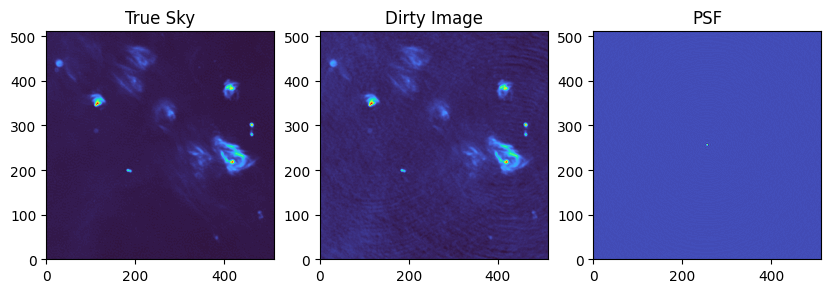

In [16]:
dirty = helpers.readFits("lambda_tests/SGRE_full_dirty.fits")
psf = helpers.readFits("lambda_tests/SGRE_full_psf.fits")
gt = helpers.readFits("lambda_tests/SGRE_full_gt.fits")

helpers.plotGDP(gt, dirty, psf, cmap)

path = "results/lambda_results/SGRE_full/"

Best Lambda according to SNR: 0.04786300923226383


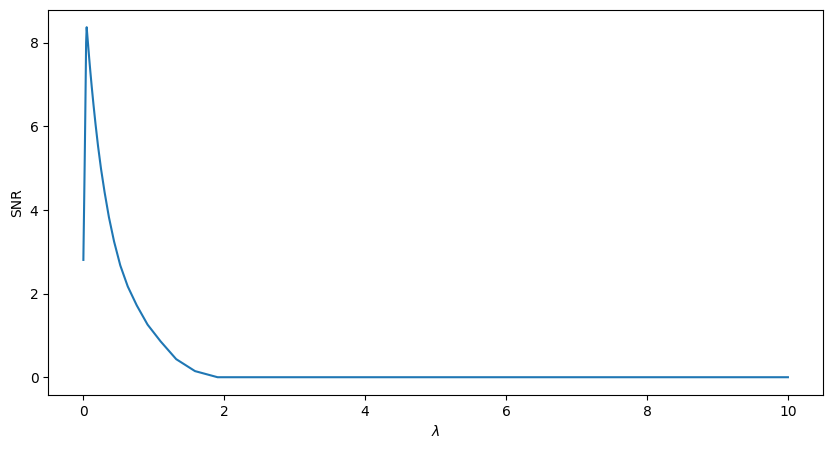

Best Lambda according to SSIM: 0.04786300923226383


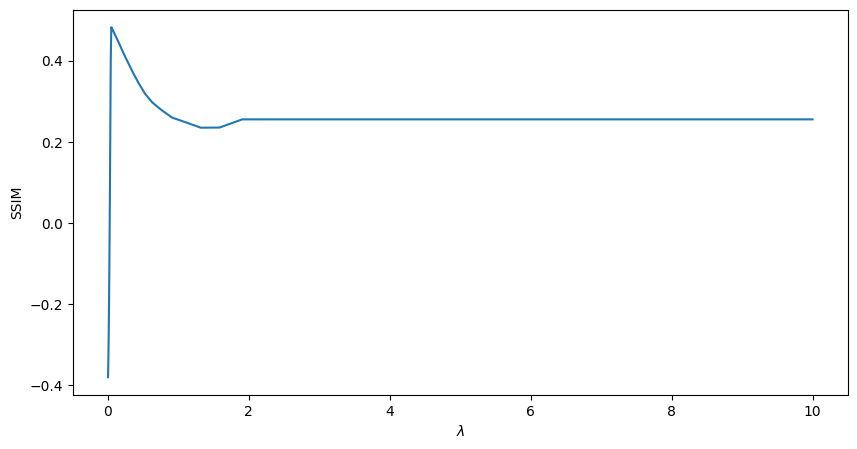

In [17]:
snrs = helpers.read_csv(path + "snr.dat")
snrs = [float(x) for x in snrs]
max_snr_idx = numpy.argmax(snrs)
print("Best Lambda according to SNR: " + str(lambdas[max_snr_idx]))
helpers.plot1D(lambdas, snrs, "$\lambda$", "SNR")

helpers.computeErrorForSavedResults(gt, lambdas, path, "ssim.dat", helpers.compute_ssim)

ssims = helpers.read_csv(path + "ssim.dat")
ssims = [float(x) for x in ssims]
max_ssim_idx = numpy.argmax(ssims)
print("Best Lambda according to SSIM: " + str(lambdas[max_ssim_idx]))
helpers.plot1D(lambdas, ssims, "$\lambda$", "SSIM")

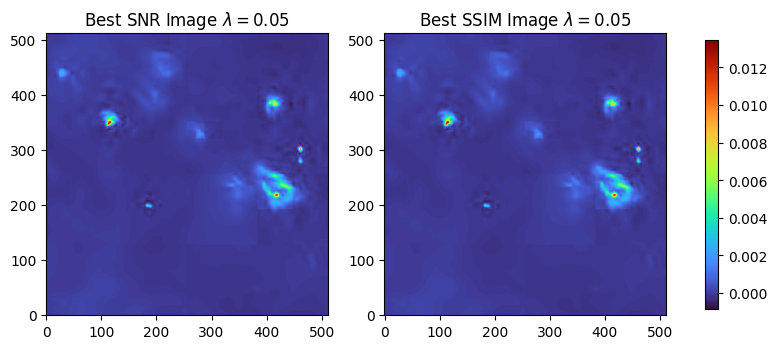

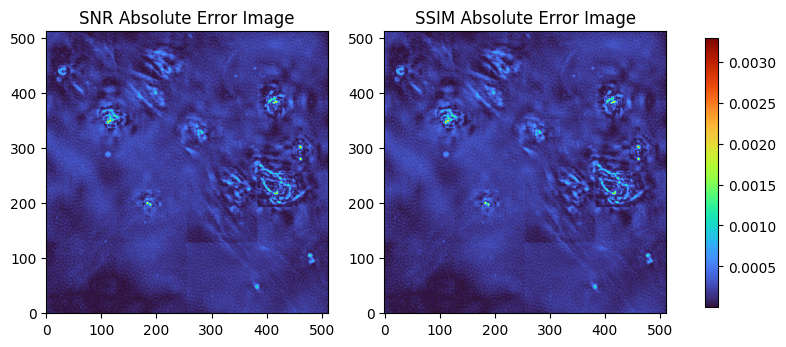

In [18]:
helpers.plotSNRvsSSIM(lambdas, path, max_snr_idx, max_ssim_idx, gt, cmap)

## Test case 6: SGR A* from Meerkat Survey with Short baselines only

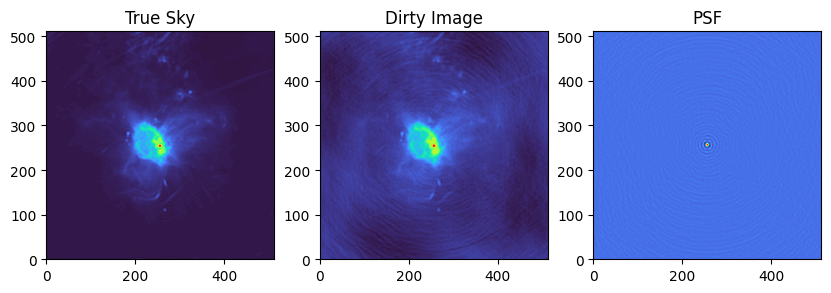

In [19]:
dirty = helpers.readFits("lambda_tests/SGRA_shortbaselines_dirty.fits")
psf = helpers.readFits("lambda_tests/SGRA_shortbaselines_psf.fits")
gt = helpers.readFits("lambda_tests/SGRA_shortbaselines_gt.fits")

helpers.plotGDP(gt, dirty, psf, cmap)

path = "results/lambda_results/SGRA_shortbaselines/"

Best Lambda: 5.754399373371572


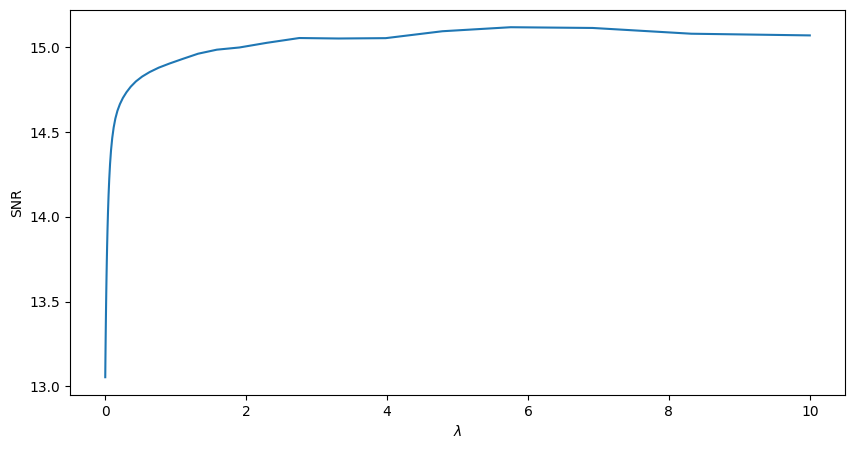

Best Lambda according to SSIM: 6.918309709189362


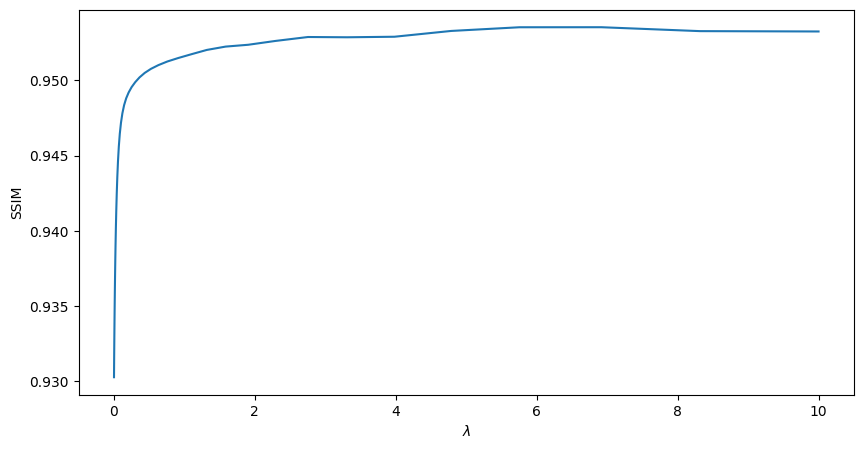

In [20]:
snrs = helpers.read_csv(path + "snr.dat")
snrs = [float(x) for x in snrs]
max_snr_idx = numpy.argmax(snrs)
print("Best Lambda: " + str(lambdas[max_snr_idx]))
helpers.plot1D(lambdas, snrs, "$\lambda$", "SNR")

helpers.computeErrorForSavedResults(gt, lambdas, path, "ssim.dat", helpers.compute_ssim)

ssims = helpers.read_csv(path + "ssim.dat")
ssims = [float(x) for x in ssims]
max_ssim_idx = numpy.argmax(ssims)
print("Best Lambda according to SSIM: " + str(lambdas[max_ssim_idx]))
helpers.plot1D(lambdas, ssims, "$\lambda$", "SSIM")

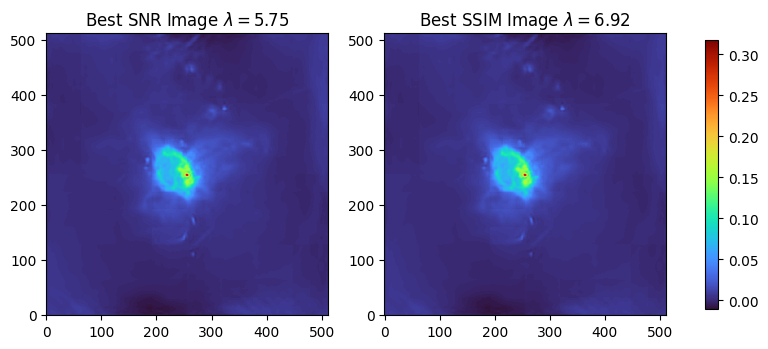

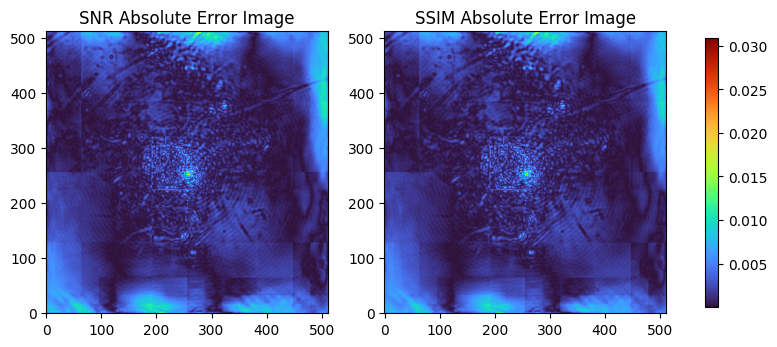

In [21]:
helpers.plotSNRvsSSIM(lambdas, path, max_snr_idx, max_ssim_idx, gt, cmap)

## Test case 7: SGR A* from Meerkat Survey with Full Reconstruction

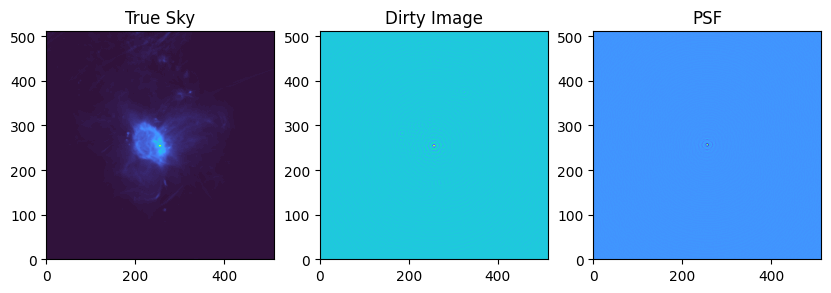

In [22]:
dirty = helpers.readFits("lambda_tests/SGRA_longbaselines_dirty.fits")
psf = helpers.readFits("lambda_tests/SGRA_longbaselines_psf.fits")
gt = helpers.readFits("lambda_tests/SGRA_full_gt.fits")
lowres = helpers.readFits("lambda_tests/SGRA_shortbaselines_gt.fits")

helpers.plotGDP(gt, dirty, psf, cmap)

path = "results/lambda_results/SGRA_multistep/"

Best Lambda: 0.015848931924611134


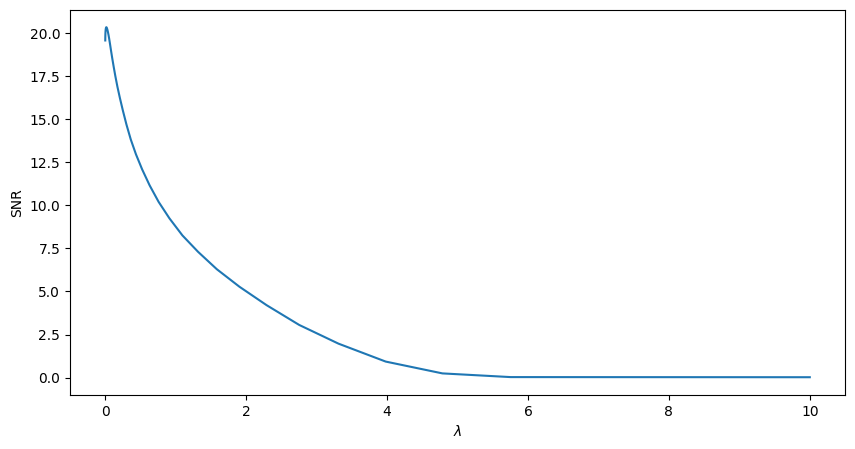

Best Lambda according to SSIM: 0.006309573444801934


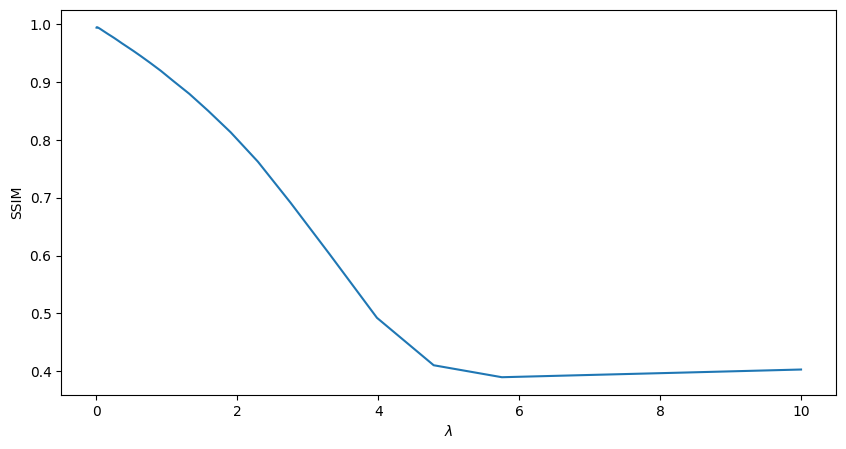

In [23]:
snrs = helpers.read_csv(path + "snr.dat")
snrs = [float(x) for x in snrs]
max_snr_idx = numpy.argmax(snrs)
print("Best Lambda: " + str(lambdas[max_snr_idx]))
helpers.plot1D(lambdas, snrs, "$\lambda$", "SNR")

helpers.computeErrorForSavedResults(gt, lambdas, path, "ssim.dat", helpers.compute_ssim)

ssims = helpers.read_csv(path + "ssim.dat")
ssims = [float(x) for x in ssims]
max_ssim_idx = numpy.argmax(ssims)
print("Best Lambda according to SSIM: " + str(lambdas[max_ssim_idx]))
helpers.plot1D(lambdas, ssims, "$\lambda$", "SSIM")

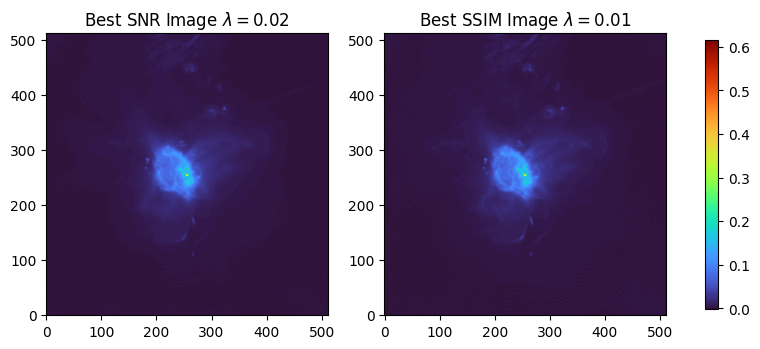

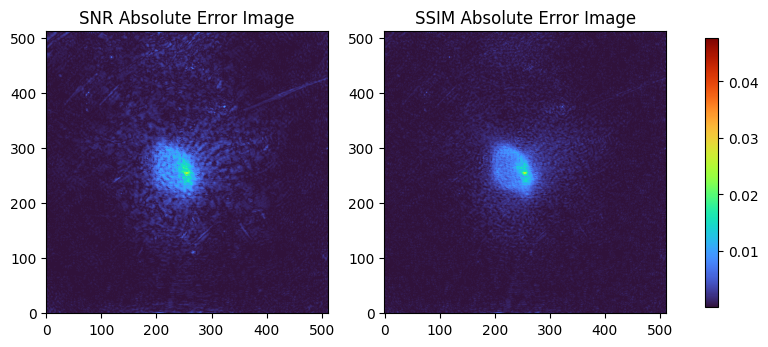

In [24]:
helpers.plotSNRvsSSIM(lambdas, path, max_snr_idx, max_ssim_idx, gt, cmap)

## Test case 8: SGR A* first residual from Meerkat Survey with 249600 visibilities

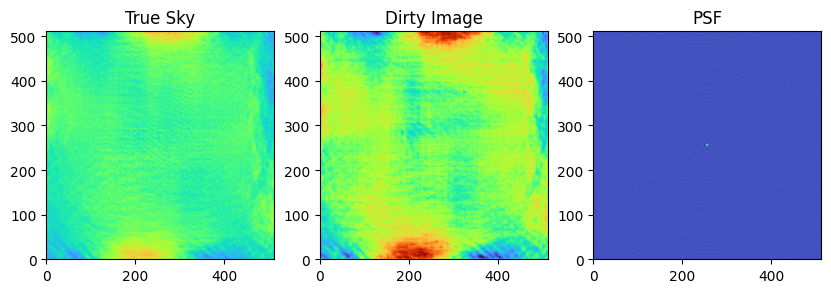

In [25]:
dirty = helpers.readFits("lambda_tests/SGRA_full_firstresidual.fits")
psf = helpers.readFits("lambda_tests/SGRA_full_psf.fits")
sky = helpers.readFits("lambda_tests/SGRA_full_gt.fits")
prev_deconv = helpers.readFits("lambda_tests/SGRA_full_deconv.fits")
gt = sky - prev_deconv
helpers.write_nparr_to_fits(gt, "lambda_tests/SGRA_full_firstresidual_gt.fits")

helpers.plotGDP(gt, dirty, psf, cmap)

path = "results/lambda_results/SGRA_firstresid/"

Best Lambda: 1.584893192461114


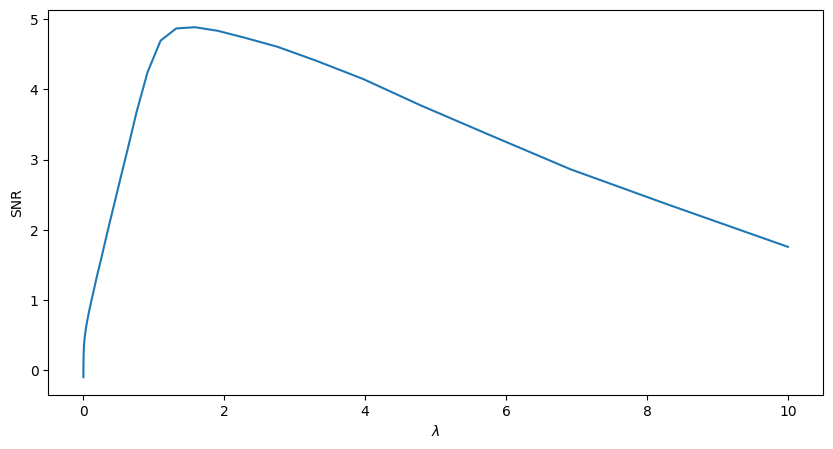

Best Lambda according to SSIM: 1.3182567385564075


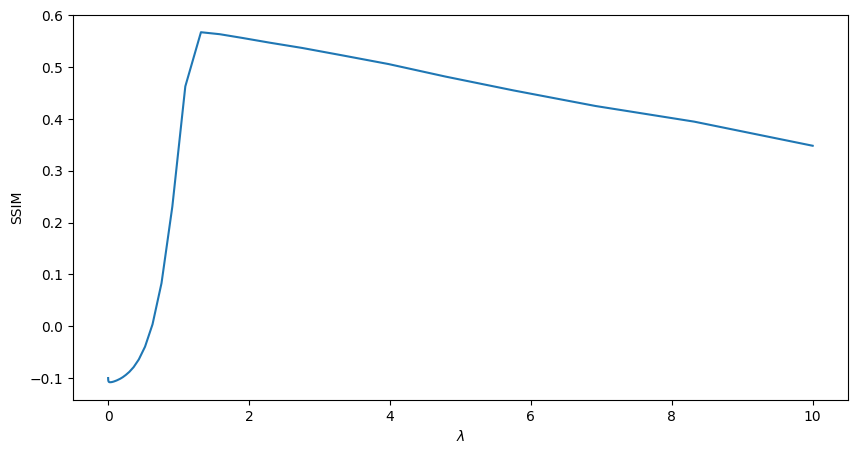

In [26]:
snrs = helpers.read_csv(path + "snr.dat")
snrs = [float(x) for x in snrs]
max_snr_idx = numpy.argmax(snrs)
print("Best Lambda: " + str(lambdas[max_snr_idx]))
helpers.plot1D(lambdas, snrs, "$\lambda$", "SNR")

helpers.computeErrorForSavedResults(gt, lambdas, path, "ssim.dat", helpers.compute_ssim)

ssims = helpers.read_csv(path + "ssim.dat")
ssims = [float(x) for x in ssims]
max_ssim_idx = numpy.argmax(ssims)
print("Best Lambda according to SSIM: " + str(lambdas[max_ssim_idx]))
helpers.plot1D(lambdas, ssims, "$\lambda$", "SSIM")

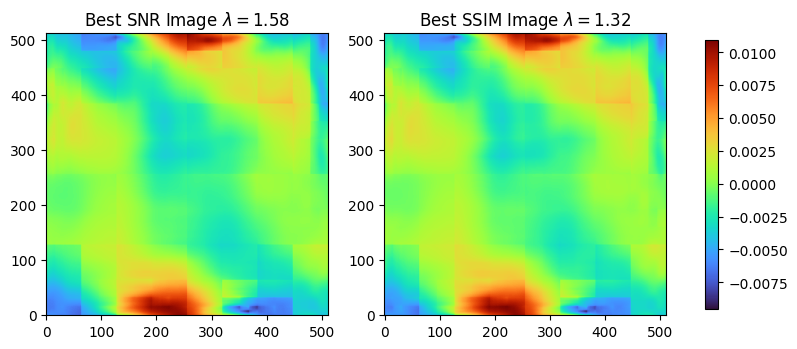

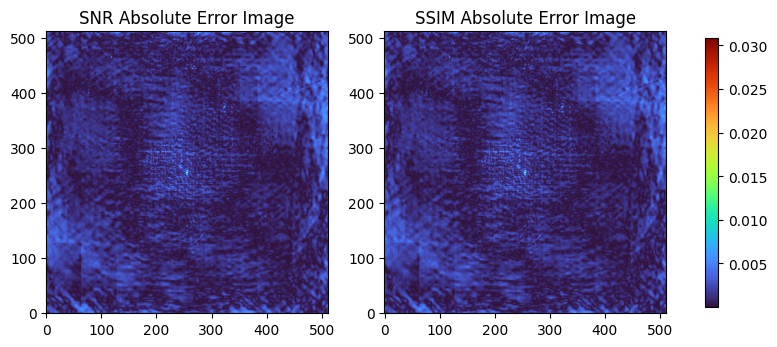

In [27]:
helpers.plotSNRvsSSIM(lambdas, path, max_snr_idx, max_ssim_idx, gt, cmap)

## Test case 9: SGR A* second residual from Meerkat Survey with 249600 visibilities

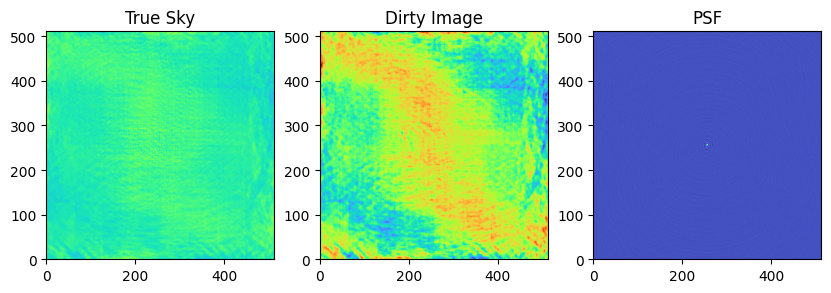

In [28]:
dirty = helpers.readFits("lambda_tests/SGRA_full_secondresidual.fits")
psf = helpers.readFits("lambda_tests/SGRA_full_psf.fits")
sky = helpers.readFits("lambda_tests/SGRA_full_gt.fits")
prev_prev_deconv = helpers.readFits("lambda_tests/SGRA_full_firstdeconv.fits")
prev_deconv = helpers.readFits("lambda_tests/SGRA_full_seconddeconv.fits")
gt = sky - prev_prev_deconv - prev_deconv
helpers.write_nparr_to_fits(gt, "lambda_tests/SGRA_full_secondresidual_gt.fits")

helpers.plotGDP(gt, dirty, psf, cmap)

path = "results/lambda_results/SGRA_secondresid/"

Best Lambda: 3.311311214825911


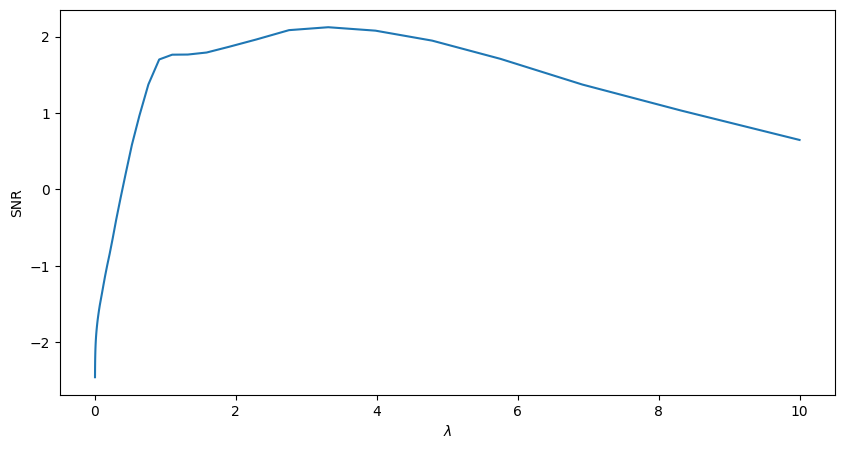

Best Lambda according to SSIM: 10.0


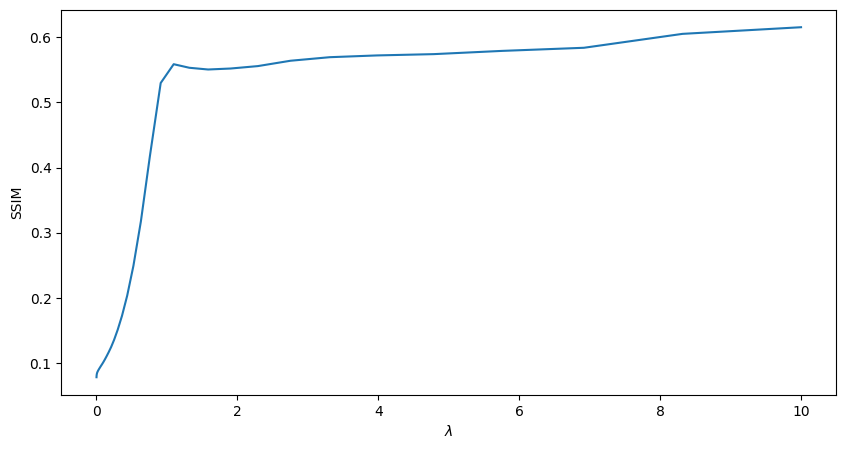

In [29]:
snrs = helpers.read_csv(path + "snr.dat")
snrs = [float(x) for x in snrs]
max_snr_idx = numpy.argmax(snrs)
print("Best Lambda: " + str(lambdas[max_snr_idx]))
helpers.plot1D(lambdas, snrs, "$\lambda$", "SNR")

helpers.computeErrorForSavedResults(gt, lambdas, path, "ssim.dat", helpers.compute_ssim)

ssims = helpers.read_csv(path + "ssim.dat")
ssims = [float(x) for x in ssims]
max_ssim_idx = numpy.argmax(ssims)
print("Best Lambda according to SSIM: " + str(lambdas[max_ssim_idx]))
helpers.plot1D(lambdas, ssims, "$\lambda$", "SSIM")

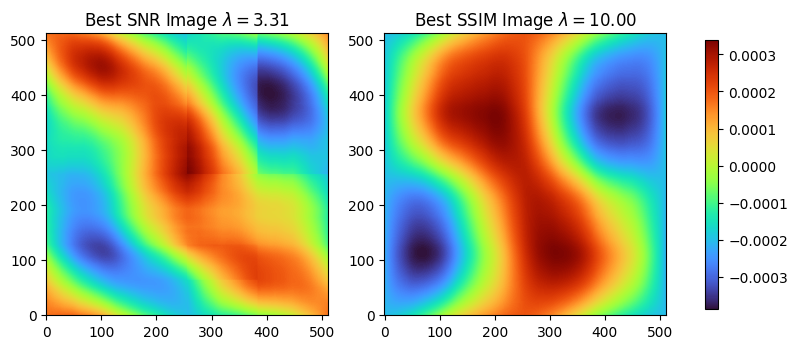

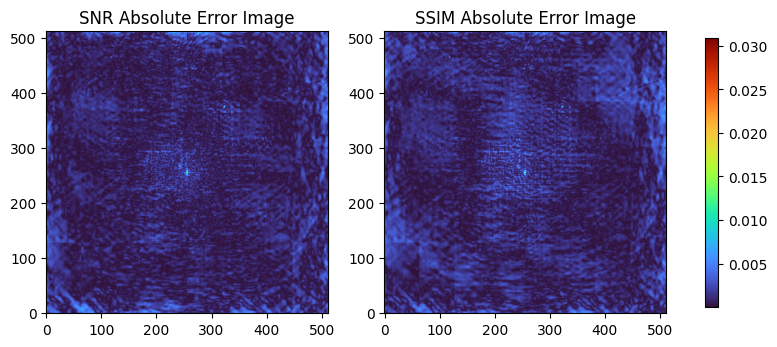

In [30]:
helpers.plotSNRvsSSIM(lambdas, path, max_snr_idx, max_ssim_idx, gt, cmap)